# Singular Value Decomposition

In this notebook, we will illustrate a few applications of the SVD.

In [1]:
#Import stuff that we need
import numpy as np
import matplotlib.pyplot as plt


#Some code to beautify the plots
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

## 1. Compressing images

/var/folders/lk/9_5fr70s2kg8vcz4xcqh_0y00000gq/T/ipykernel_91654/916437387.py:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True)


The size of the image is (768, 1024)


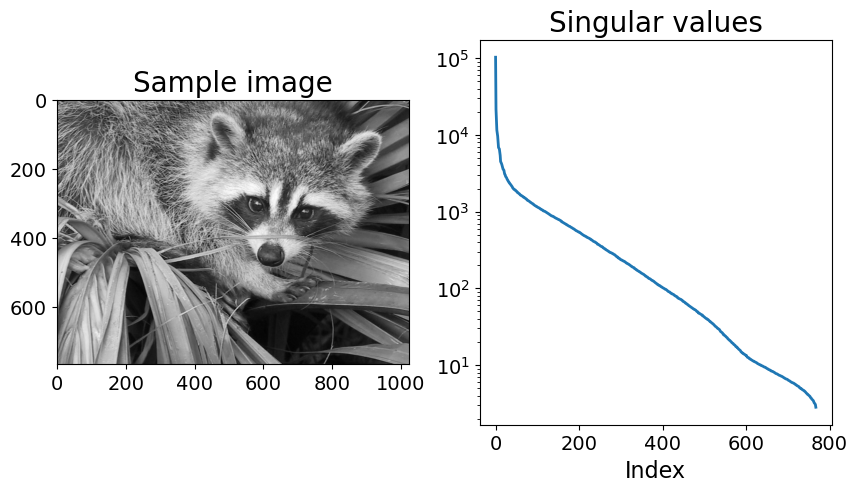

In [2]:
# Read image 
from scipy import misc
face = misc.face(gray=True)
print("The size of the image is", face.shape)

# Compute the SVD of the image
A = face
u,s,vh = np.linalg.svd(A, full_matrices = False)


#Plot the image alongside the singular values
f, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.imshow(face, cmap=plt.cm.gray)
ax1.set_title('Sample image', fontsize = 20)
ax2.semilogy(s, linewidth = 2.0)
ax2.set_xlabel('Index', fontsize = 16)
ax2.set_title('Singular values', fontsize = 20)
plt.show()

### Compute the relative error and the storage costs

In [3]:

#Define the target ranks
ranks = range(20,700,20)

error  = np.zeros((len(ranks),2))
A2nrm  = np.linalg.norm(A, 2)
Afnrm  = np.linalg.norm(A, 'fro')


m,n = A.shape
storage = np.zeros((len(ranks),1))

#Compute the partial errors and storage costs
for i, r in zip(range(len(ranks)),ranks):
    ur  = u[:,:r]
    sr  = s[:r]
    vhr = vh[:r,:]
    
    #Compute the partial decomposition Ar = Ur*Sr*Vhr
    Ah = np.dot(ur,np.dot(np.diag(sr),vhr))
    
    error[i,0] = np.linalg.norm(Ah-A,2)/A2nrm
    error[i,1] = np.linalg.norm(Ah-A,'fro')/Afnrm
    
    storage[i] = r*(m+n+1.)/(m*n)

### Plot the errors and the storage costs

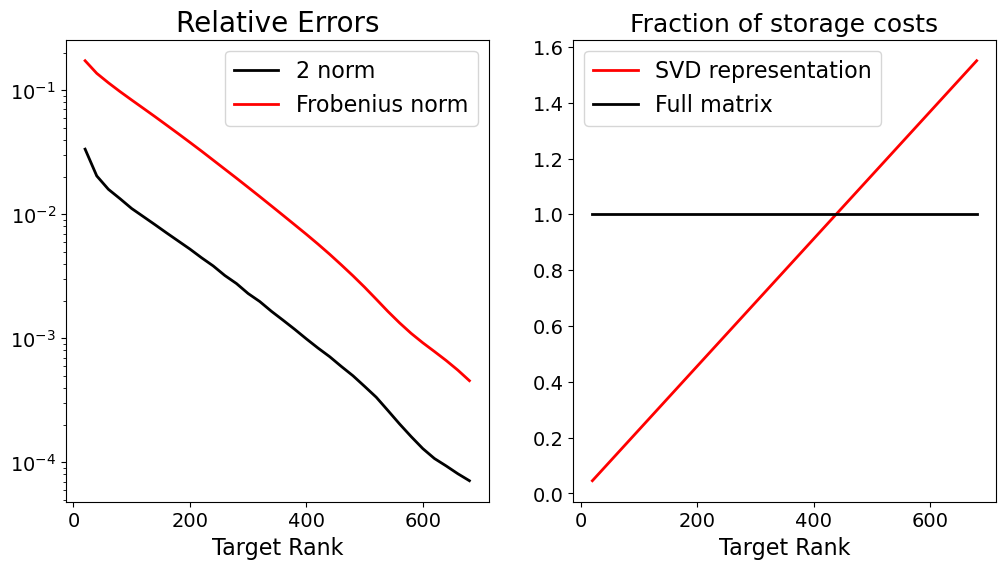

In [4]:
f, (ax1, ax2) = plt.subplots(1,2, figsize = (12,6))
ax1.semilogy(ranks,error[:,0], 'k-', ranks, error[:,1], 'r-', linewidth = 2.0)
ax1.set_xlabel('Target Rank', fontsize = 16)
ax1.set_title('Relative Errors', fontsize = 20)
ax1.legend(('2 norm', 'Frobenius norm'), fontsize = 16)

    
ax2.plot(ranks,storage, 'r-', ranks, np.ones_like(storage), 'k-', linewidth = 2.0)
ax2.set_xlabel('Target Rank', fontsize = 16)
ax2.set_title('Fraction of storage costs', fontsize = 18)
ax2.legend(('SVD representation','Full matrix'), fontsize = 16)
plt.show()    
    
    

### Plot a few sample compressed images

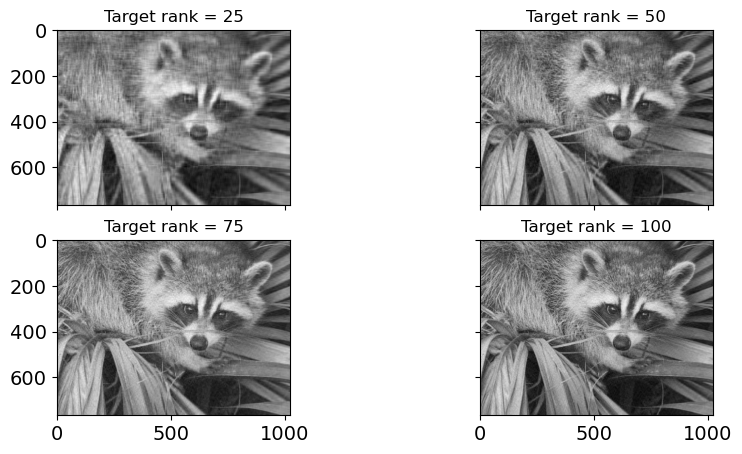

In [5]:
rankslst = [25,50,75,100]
f, axarray = plt.subplots(2,2, sharex = True, sharey = True)

#Compute the partial errors and storage costs
for r,ax in zip(rankslst,axarray.flatten()):
    ur  = u[:,:r]
    sr  = s[:r]
    vhr = vh[:r,:]
    
    #Compute the partial decomposition Ar = Ur*Sr*Vhr
    Ah = np.dot(ur,np.dot(np.diag(sr),vhr))
    
    ax.imshow(Ah, cmap=plt.cm.gray)
    ax.set_title('Target rank = ' + str(r))
    
    
plt.show()

## 2. Denoising images

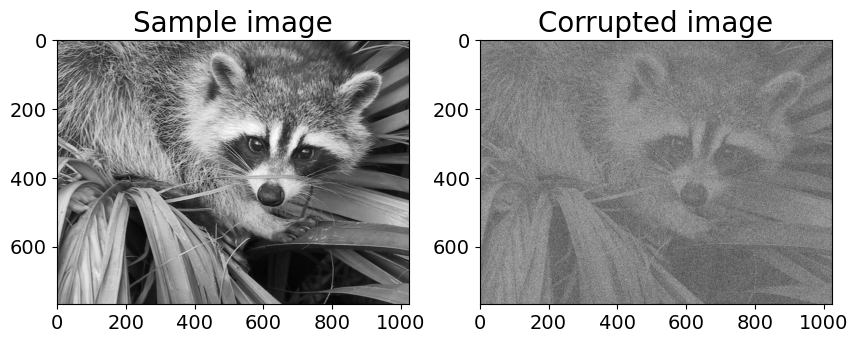

In [6]:
noise = np.random.randn(A.shape[0],A.shape[1])*(1.e-3*A2nrm)

# Add noise to the matrix to corrupt it
An = A + noise 

f, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(A, cmap=plt.cm.gray)
ax1.set_title('Sample image', fontsize = 20)
ax2.imshow(An, cmap=plt.cm.gray)
ax2.set_title('Corrupted image', fontsize = 20)
plt.show()


## Plot the singular values of the corrupted image

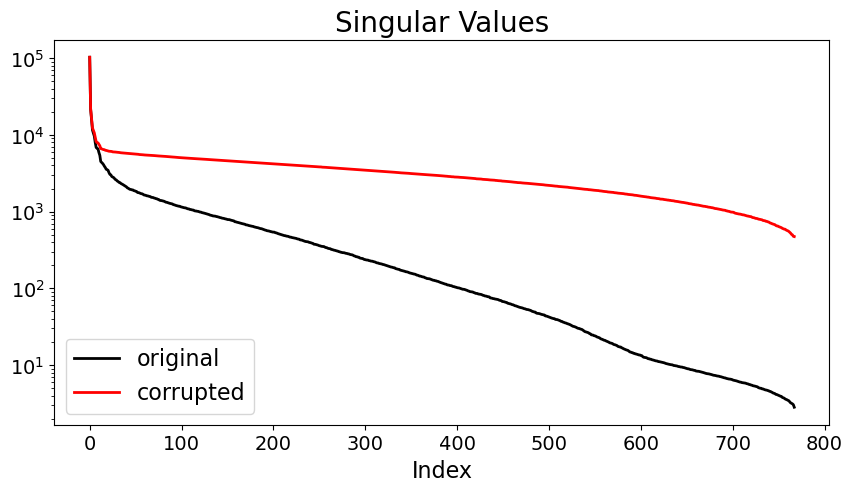

In [7]:
sn = np.linalg.svd(An, compute_uv = False)

ind = range(s.size)
plt.figure()
plt.semilogy(ind, s, 'k-', ind, sn, 'r-', linewidth = 2.0)
#plt.semilogy(ind, np.ones_like(s)*np.linalg.norm(noise), 'b--')
plt.legend(('original','corrupted'), fontsize = 16, loc = 'lower left')
plt.title('Singular Values', fontsize = 20)
plt.xlabel('Index', fontsize = 16)
plt.show()

## Recover the image based on a lower target rank

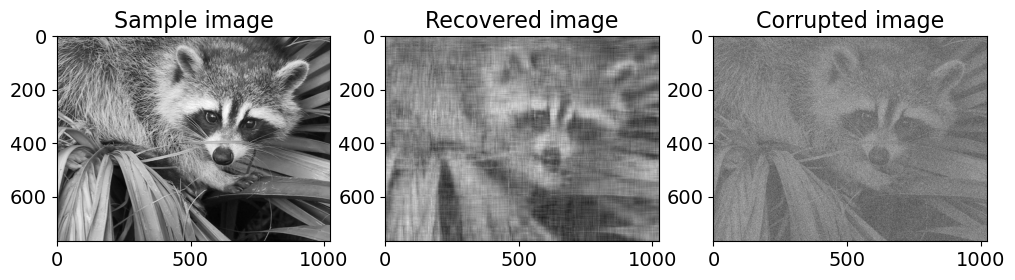

In [8]:
r = 15 # Target rank

#Compute the SVD of the full matrices
u,s,vh = np.linalg.svd(An, full_matrices = False)
ur  = u[:,:r]; sr  = s[:r]; vhr = vh[:r,:]
    
#Compute the partial decomposition Ar = Ur*Sr*Vhr
Ah = np.dot(ur,np.dot(np.diag(sr),vhr))

f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (12,4))
ax1.imshow(A, cmap=plt.cm.gray)
ax1.set_title('Sample image', fontsize = 16)
ax2.imshow(Ah, cmap=plt.cm.gray)
ax2.set_title('Recovered image', fontsize = 16)
ax3.imshow(An, cmap=plt.cm.gray)
ax3.set_title('Corrupted image', fontsize = 16)
plt.show()


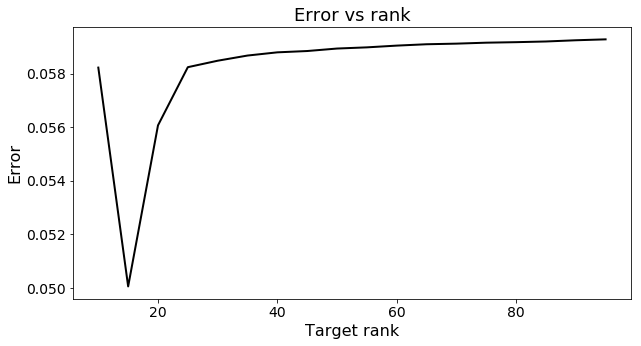

In [9]:
# plot the error with the target rank
ranks = range(10,100,5)
err = np.zeros((len(ranks),))
for i, r in zip(range(len(ranks)),ranks):
    #Compute the SVD of the full matrices
    ur  = u[:,:r]; sr  = s[:r]; vhr = vh[:r,:]

    #Compute the partial decomposition Ar = Ur*Sr*Vhr
    Ah = np.dot(ur,np.dot(np.diag(sr),vhr))
    
    err[i] = np.linalg.norm(Ah-A,2)/A2nrm
    
plt.figure()
plt.plot(ranks,err,'k-',linewidth = 2.0)
plt.xlabel('Target rank', fontsize = 16)
plt.ylabel('Error', fontsize = 16)
plt.title('Error vs rank', fontsize = 18)
plt.show()